In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM']
all_data = get(tickers, datetime.datetime(2000, 1, 1),datetime.datetime.today())
all_data.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2000-01-03  4.017857  3.631696  3.745536  3.997768  133949200.0   
       2000-01-04  3.950893  3.613839  3.866071  3.660714  128094400.0   
       2000-01-05  3.948661  3.678571  3.705357  3.714286  194580400.0   
       2000-01-06  3.821429  3.392857  3.790179  3.392857  191993200.0   
       2000-01-07  3.607143  3.410714  3.446429  3.553571  115183600.0   

                   Adj Close  
Ticker Date                   
AAPL   2000-01-03   2.677157  
       2000-01-04   2.451444  
       2000-01-05   2.487319  
       2000-01-06   2.272070  
       2000-01-07   2.379695

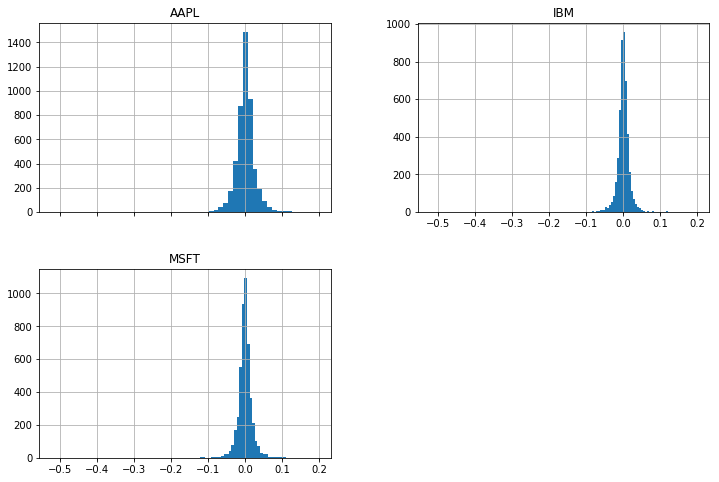

In [111]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [6]:
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.datetime.today())
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2018-11-16    214.612031
2018-11-19    213.757974
2018-11-20    212.647038
2018-11-21    211.575198
2018-11-23    210.278252
2018-11-26    209.019875
2018-11-27    207.714130
2018-11-28    206.525560
2018-11-29    205.232733
2018-11-30    204.017301
Name: Adj Close, dtype: float64

In [7]:

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.datetime.today())

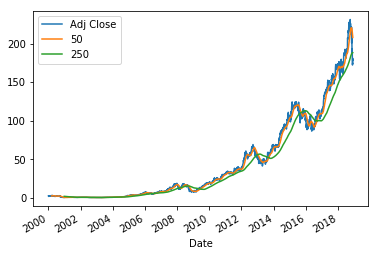

In [8]:
# Short moving window rolling mean
aapl['50'] = adj_close_px.rolling(window=50).mean()

# Long moving window rolling mean
aapl['250'] = adj_close_px.rolling(window=250).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '50', '250']].plot()

plt.show()

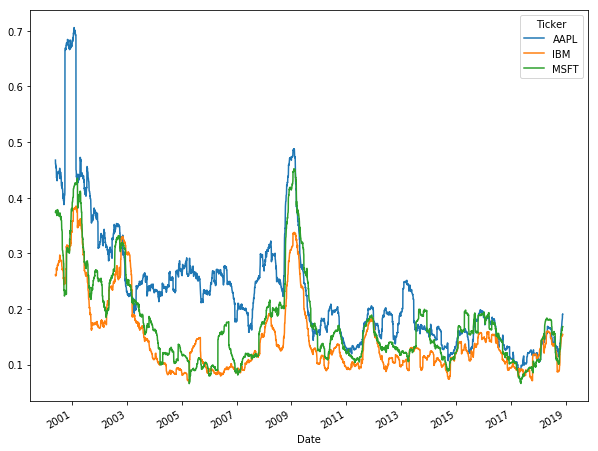

In [164]:
# Define the minumum of periods to consider 
min_periods = 100 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [172]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Isolate the IBM returns
ibm_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'IBM']
ibm_returns.index = ibm_returns.index.droplevel('Ticker')


# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns,ibm_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT','IBM']
return_data.head()



,AAPL,MSFT,IBM
Date,,,
2000-01-04,-0.088078,-0.034364,-0.034534
2000-01-05,0.014528,0.010489,0.034534
2000-01-06,-0.090514,-0.034072,-0.017392
2000-01-07,0.046281,0.012983,-0.004395
2000-01-10,-0.017745,0.007265,0.038882


In [173]:
return_data.corr()

,AAPL,MSFT,IBM
AAPL,1.000000,0.407272,0.383064
MSFT,0.407272,1.000000,0.486044
IBM,0.383064,0.486044,1.000000


In [196]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(return_data, test_size = 0.3)
x_train = train.iloc[0:,1:3]
y_train = train.iloc[0:,0:1]
x_test = test.iloc[0:,1:3]
y_test = test.iloc[0:,0:1]


In [197]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [198]:
testing_predictions  = model.predict(x_test)


In [199]:
model.score(x_test,y_test)

0.2739597309723931